#  Image Classification Coursework

As you are reading this, technological advancements are in constant motion and it appears that machine learning is at its fore front. Machine learning has become a common discussion among scholars and civilians alike. In this program, we are utilizing classifiers like Support Vector Machines and Artificial Neural Networks to help classify images. The purpose of this program, specifically, is to compare different approaches with these two types of classifiers in order to provide the quantitatively superior accuracy rate.

In order to begin this program, we will import the needed libraries and packages that will be used to help us in our endeavour to find the best machine learning route, in regards to image classification.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
import skimage.feature
import tensorflow as tf
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import confusion_matrix
from tensorflow import keras

Once our library are imported, let us define a couple of helpful functions. The first function, which was provided to us (Thank you Prof. X!) will help us in extracting the discrete features from each image. We were able to utilize the second function from the Scikit-Learn website and we will use it to beautify our confusion matrices.

In [3]:
def computeFeatures(image):
    # This function computes the HOG features with the parsed hyperparameters and returns the features as hog_feature. 
    # By setting visualize=True we obtain an image, hog_as_image, which can be plotted for insight into extracted HOG features.
    
    hog_feature, hog_as_image = skimage.feature.hog(image, visualize=True, block_norm='L2-Hys')
    return hog_feature, hog_as_image

In [4]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix', 
                          cmap=plt.cm.Purples):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
            horizontalalignment = 'center',
            color = 'white' if cm[i,j] > thresh else 'black')
    
    plt.ylim(-1,10)
    plt.xlim(-1,10)
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

After our libraries have been imported and our functions defined, let us begin our program by importing the data from the files provided. We can see that our data has been seperated into seperate training and testing data (Once again, thank you Prof. X). We will also conduct a few modifications that will be needed to move forward in our journey.

In [5]:
# These variables will take in and load the data that has been provided.
trainImages = np.load('trnImage.npy')
trainLabels = np.load('trnLabel.npy')
testImages = np.load('tstImage.npy')
testLabels = np.load('tstLabel.npy')

# The purpose of flattening our label data is to convert our data into a 1D vector in order to make connections with our final layer.
flattened_trainLabels = trainLabels.flatten()
flattened_testLabels = testLabels.flatten(order ='C')

# Here we are creating a list of the corresponding label titles that we will use for our confusion matrices. 
cm_labels = ['Airplanes', 'Automobiles', 'Birds', 'Cats', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In the code below, we are using the first function that we defined in order to create variables that will compute the distinct features of each independent image from both the training and testing datasets.

In [6]:
# Here you are computing the 324 features from the 10000 testing images
train_features = np.zeros((10000, 324))
for trnindx in range(10000):
    features, hog_image = computeFeatures(trainImages[:,:,:,trnindx])
    train_features[trnindx] = features

# Here you are computing the 324 features the 1000 training images
test_features = np.zeros((1000, 324))
for trnindx in range(1000):
    features, hog_image = computeFeatures(testImages[:,:,:,trnindx])
    test_features[trnindx] = features

## Support Vector Machine

The first supervised learning model that we will test is the Support Vector Machine. In short, using a Support Vector Machine will assist us in building a model that will plot datapoints based on the specific image and the meaningfulness of the feature. Here specifically, we can see that we are comparing the training and testing images on features 20 and 30.

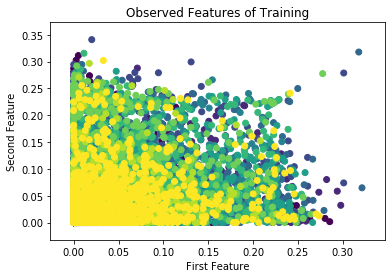

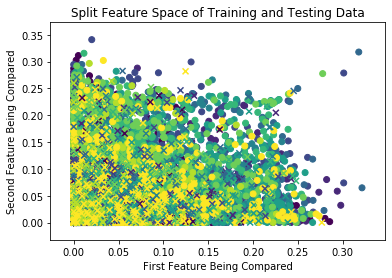

In [7]:
# The first scatter plot is showing the extracted features from the training images.
plt.scatter(train_features[:, 10], train_features[:, 20], marker='o', c=flattened_trainLabels)
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.title('Observed Features of Training')
plt.show()

# The second scatter plot is showing the extracted features from the testing images on top of those from the training images.
plt.scatter(train_features[:, 10], train_features[:, 20], marker='o', c=flattened_trainLabels)
plt.scatter(test_features[:, 10], test_features[:, 20], marker='x', c=flattened_testLabels)
plt.xlabel('First Feature Being Compared')
plt.ylabel('Second Feature Being Compared')
plt.title('Split Feature Space of Training and Testing Data')
plt.show()

Once we have plotted the feature strength for all of our images we are able to create a SVM classifier in order to quantify the accuracy rate of using this approach. In our Support Vector Classifier model we are able to change the values of the regularization parameter (C), kernel parameter, and the value of gamma in order to calculate the best accuracy percentage.

In [8]:
# Here we are creating the SVC model for our SVM. 
svm_model = SVC(kernel='rbf', C=5000, gamma=0.1)

# We then fit the model to the training features dataset, given the training labels.
svm_model.fit(train_features, flattened_trainLabels)

# Now we can use the model to predict the label from the testing features.
svm_predicted_labels = svm_model.predict(test_features)

# This will now calculate the percentage accuracy rate on the test set.
accuracy = np.sum(np.equal(flattened_testLabels, svm_predicted_labels)) / flattened_testLabels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 56.20%


Above we have listed the highest accuracy percentage that we have been able to calculate. Below, we have provided a few of the other percentages we calculated when different values were used in the modeling function:

    C = 5000  kernel = 'sigmoid'  gamma = 0.001   Accuracy Percentage: 49.8%
    C = 500   kernel = 'linear'   gamma = N/A     Accuracy Percentage: 47.9%
    C = 50    kernel = 'poly'     gamma = 0.0001  Accuracy Percentage: 43.7%
    C = 500   kernel = 'rbf'      gamma = 0.001   Accuracy Percentage: 51.5%

Now that we have calculated the accuracy percentage with our SVM model, we are able to illustrate the confusion matrix using the second function that we defined earlier. This confusion matrix will provide us with the count of each image that was correctly identified as well as those that were not.

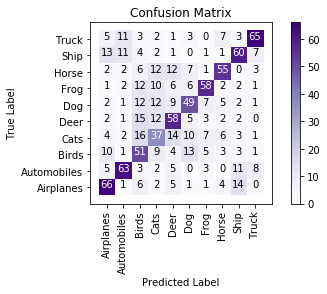

In [9]:
# Rounds Explicit Probabilities to whole numbers that correlate to the label classes.
rounded_predicted_probabilities = svm_model.predict(test_features)

# We now create our Basic Confusion Matrix.
svm_cm = confusion_matrix(flattened_testLabels, rounded_predicted_probabilities)

# Using our defined function we can illustrate a more detailed Confusion Matrix.
plot_confusion_matrix(svm_cm, cm_labels, title='Confusion Matrix')

## Neural Networks

The second supervised learning model that we will test is the Artificial Neural Network. Using neural networks, we are able to utilize the extracted features in a way in which our system will logically interpret the images and classify the images based on their most dominant features.

In [10]:
# Calculates the number of classes
number_of_classes = np.max(trainLabels) + 1

# This creates the neural network architecture in a Keras Sequential object.
model = keras.Sequential()

# Input Layer: There are 324 nodes in this layer. One node for each feature.
model.add(keras.layers.InputLayer(input_shape=(train_features.shape[1],)))

# Hidden Layer: We are using one hidden layer where the number of nodes is the mean of nodes in the input and output layer.
model.add(keras.layers.Dense(167, activation='relu'))
model.add(keras.layers.Dense(167, activation='relu'))

# Output Layer: There are 11 nodes in this layer.
# Softmax is usually the best activation function for output layers.
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))

# We now generate a callable Keras Model which contains our architecture.
# This will allow us to train and predict our neural network on the datasets.
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

# This fits our model to the data.
history = model.fit(train_features, flattened_trainLabels, validation_data=(test_features, flattened_testLabels), epochs=250, verbose=0)

# Predicts probabilities of classes for the testing set of features.
predicted_probabilities = model.predict(test_features, batch_size=10, verbose=0)

# We'll use argmax to get the predicted class label.
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Calculates the percentage accuracy rate on test set.
accuracy = np.sum(np.equal(flattened_testLabels, predicted_labels)) / flattened_testLabels.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 56.40%


Above we have listed the highest accuracy percentage that we have been able to calculate. Below, we have provided a few of the other percentages we calculated when different values were used in the modeling function. After several trials we have deducted that letting epochs = 250 returns the best accuracy percentage. For this reason, the examples listed below were all calculated with this in mind:

    Hidden Layers = 2   Nodes per layer = 10   Activation = 'sigmoid'   Accuracy: 22.7%       
    Hidden Layers = 1   Nodes per layer = 100  Activation = 'sigmoid'   Accuracy: 43.9%
    Hidden Layers = 2   Nodes per layer = 167  Activation = 'LeakyReLU' Accuracy: 49.4%
    Hidden Layers = 20  Nodes per layer = 20   Activation = 'relu'      Accuracy: 45.3%

After quantifying our accuracy percentage we can now move on to creating our confusion matrix. Once again we will call our previously defined function that was provided to us ever so graciously on the Scikit-Learn website in order to create it.

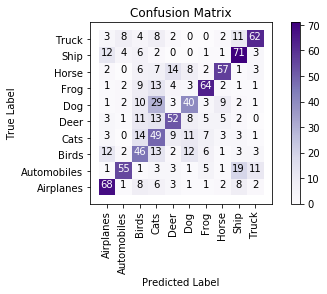

In [11]:
# Rounds Explicit Probabilities to whole numbers that will now correlate to Labels.
rounded_predicted_probabilities = model.predict_classes(test_features, batch_size=10, verbose=0)

# This will create our Basic Confusion Matrix.
nn_cm = confusion_matrix(flattened_testLabels, rounded_predicted_probabilities)

# Calling the function will illustrate our Confusion Matrix.
plot_confusion_matrix(nn_cm, cm_labels, title='Confusion Matrix')

## Naive Bayes Classifier (Extra)

Now that the "main" supervised learning methods have been called into action, out of pure curiousity and pleasure I have used the Naive Bayes Classifier as another example. From a quantitative standpoint, this classifier is less effective than the ones previously used. We can see that the percentage accuracy is lower than those we have already derived, but I decided to mention this side note nonetheless.

Percentage accuracy on testing set is: 43.20%


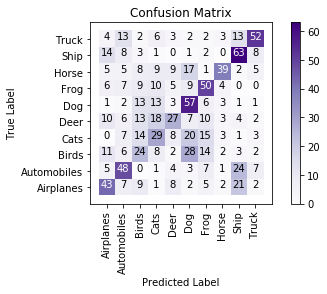

In [12]:
# This will import the needed library needed to use the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

# Here we are creating the model, fitting the features with the labels, and prediciting our labels based on our test features
nb = MultinomialNB()
nb.fit(train_features, flattened_trainLabels)
label_Prediction = nb.predict(test_features)

# Now we can calculate the accuracy percentage
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(flattened_testLabels, label_Prediction) * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(nb_accuracy))

# Creates a basic confusion matrix using the above calculations
nb_cm = confusion_matrix(flattened_testLabels, label_Prediction)

# Illustrates better Confusion Matrix using function defined earlier
plot_confusion_matrix(nb_cm, cm_labels, title='Confusion Matrix')

## Conclusion

In summary, we have tested both the SVM and Neural Network classifiers in order to optimize image classification with extracted features. We have determined that, although the accuracy percentages came relatively close, using the hog features in a Support Vector Machine classifier provides the highest rate. Now, not to demean any of the code or example that we have gone through, but there are an infinite number of combinations that could be used for these classifiers. Although, I firmly believe that SVM will out perform the NN in these examples, the percentage threshold may be possibly broken.